In [30]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
OUT_FOLDER = '/mnt/s/l2t_plots'

In [2]:
con = duckdb.connect('/mnt/s/learn2therm.ddb')

### Protein pairs

In [6]:
ogt_diff_effect = con.execute("""SELECT m_taxa.temperature AS meso_ogt,
                          t_taxa.temperature AS thermo_ogt,
                          thermo_ogt - meso_ogt AS ogt_diff
                          FROM pairs
                          JOIN taxa AS m_taxa ON (pairs.meso_taxid = m_taxa.taxid)
                          JOIN taxa AS t_taxa ON (pairs.thermo_taxid = t_taxa.taxid)
                          """).fetchnumpy()

In [12]:
len(ogt_diff_effect['ogt_diff'])

69447326

In [16]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80, 85, 90, 95, 100]

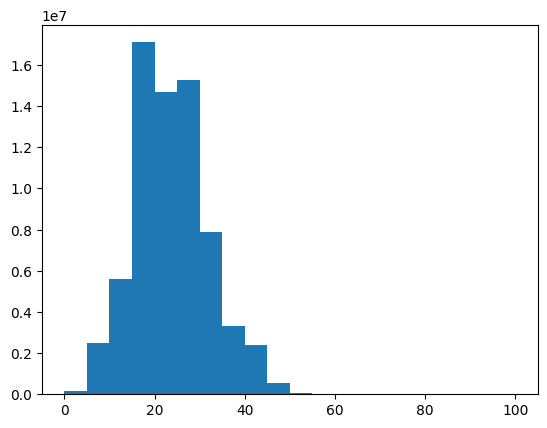

In [17]:
n, bins, _ = plt.hist(ogt_diff_effect['ogt_diff'], bins = bins)

data = {'Bins':bins[:-1], 'Counts':n}

In [38]:
ogt_diff_prot = pd.DataFrame(data)
ogt_diff_prot.to_csv(f'{OUT_FOLDER}/protein_ogt_diff_hist.csv', index = False)

In [37]:
remaining = []
max_diff = 80

for i in range(max_diff):
    remaining.append(np.sum(ogt_diff_effect['ogt_diff'] >= i))
    
remaining_pct = [i/len(ogt_diff_effect['ogt_diff']) for i in remaining]

rem = {'dT':range(max_diff), 'remaining':remaining, 'pct':remaining_pct}

remaining_df = pd.DataFrame(rem)
remaining_df.to_csv(f'{OUT_FOLDER}/pairs_remaining_ogt.csv', index = False)

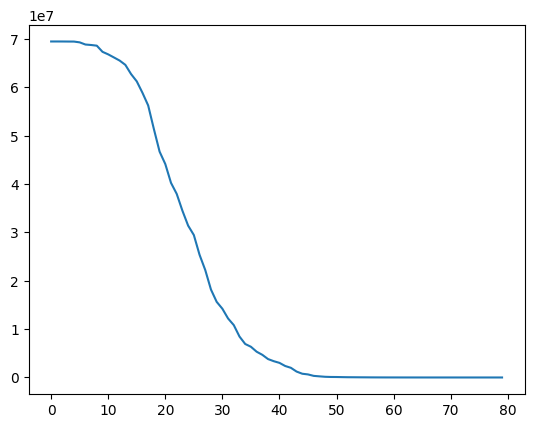

In [23]:
plt.plot(remaining)

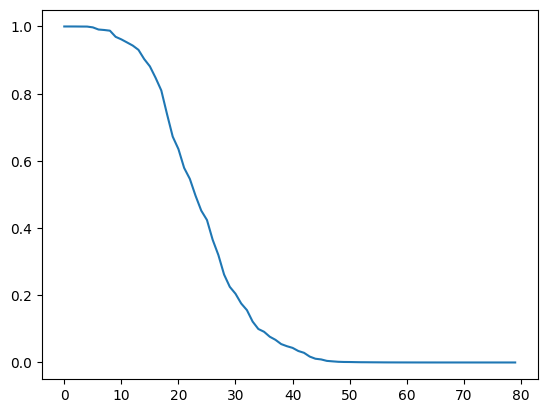

In [32]:
remaining_pct = [i/len(ogt_diff_effect['ogt_diff']) for i in remaining]
plt.plot(remaining_pct)

### Taxa pairs

In [45]:
ogt_diff_effect_taxa = con.execute("""SELECT m_taxa.temperature AS meso_ogt,
                          t_taxa.temperature AS thermo_ogt,
                          thermo_ogt - meso_ogt AS ogt_diff
                          FROM taxa_pairs
                          JOIN taxa AS m_taxa ON (taxa_pairs.meso_taxid = m_taxa.taxid)
                          JOIN taxa AS t_taxa ON (taxa_pairs.thermo_taxid = t_taxa.taxid)
                          """).fetchnumpy()

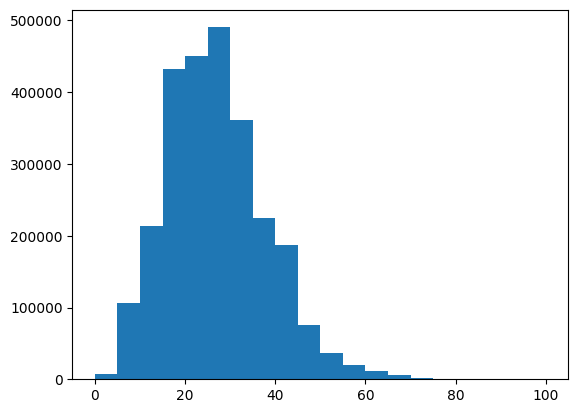

In [46]:
n, bins, _ = plt.hist(ogt_diff_effect_taxa['ogt_diff'], bins = bins)

data = {'Bins':bins[:-1], 'Counts':n}

In [42]:
ogt_diff_taxa = pd.DataFrame(data)
ogt_diff_taxa.to_csv(f'{OUT_FOLDER}/taxa_ogt_diff_hist.csv', index = False)

In [48]:
remaining = []
max_diff = 80

for i in range(max_diff):
    remaining.append(np.sum(ogt_diff_effect_taxa['ogt_diff'] >= i))
    
remaining_pct = [i/len(ogt_diff_effect_taxa['ogt_diff']) for i in remaining]

rem = {'dT':range(max_diff), 'remaining':remaining, 'pct':remaining_pct}

remaining_df = pd.DataFrame(rem)
remaining_df.to_csv(f'{OUT_FOLDER}/taxa_pairs_remaining_ogt.csv', index = False)

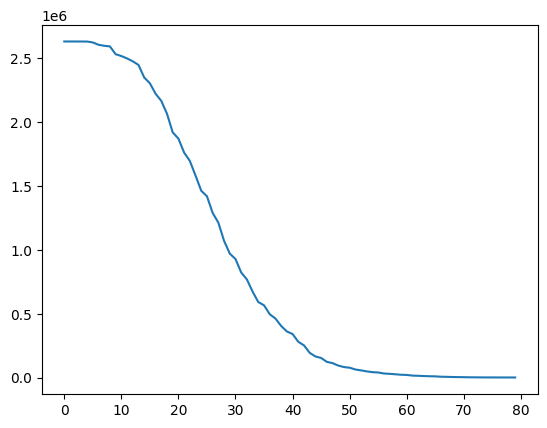

In [49]:
plt.plot(remaining)

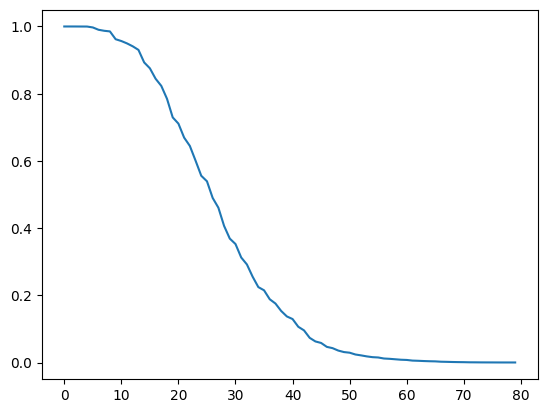

In [51]:
remaining_pct = [i/len(ogt_diff_effect_taxa['ogt_diff']) for i in remaining]
plt.plot(remaining_pct)